# Task 1: The damped harmonic oscillator

Perform an ODE integration using scipy for a damped harmonic oscillator with the above parameters and $\zeta = 0.1$ (underdamped). Plot position versus time, velocity versus time, and position versus momentum.

# Damped harmonic oscillator

In a damped harmonic oscillator, the vibrational motion of the oscillator is damped through a frictional force with damping coefficient $c$, extending the balance of forces to 
\begin{align}
m \frac{d^2x}{dt^2} = -m \omega^2 x - c \frac{dx}{dt}
\end{align}
Introducing the damping ratio $\zeta = \frac{c}{2\sqrt{mk}}=\frac{c}{2m \omega}$ and dividing by $m$ we obtain
\begin{align}
 \frac{d^2x}{dt^2} = - \omega^2 x - 2 \omega \zeta \frac{dx}{dt}
\end{align}
This leads to the following equation in vector form
\begin{align}
\frac{d }{dt} 
\begin{pmatrix} 
v \\
x
 \end{pmatrix} 
 & = 
 \frac{d }{dt}  u =
\begin{pmatrix} 
-\omega^2x - 2 \omega \zeta v \\
v
 \end{pmatrix} 
\end{align}



In [101]:
from numpy import *
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

x0,t0,v0 = 4.0,0.0,0.0

m = 1
k = 100
zeta = 0.1
tf = 5.0

def deriv(t, u, omega2):
    v, x = u
    dydt = [-omega2 * x - 2 * omega * zeta * v, v]
    return dydt

def event1(t, u, omega2):
    return u[0]
def event2(t, u, omega2):
    return u[1]


#set the initial conditions
y0 = [v0, x0]
omega2=k/m
omega= sqrt(k/m)

#ts = linspace(t0,tf,tsteps)
ts = [t0,tf]

ode = solve_ivp(deriv, ts, y0, method='DOP853', args=(omega2,), events=[event1,event2], rtol=1e-10, atol = 1e-10) 

odeRK4 = solve_ivp(deriv, ts, y0, method='RK45', args=(omega2,), rtol=1e-10, atol = 1e-10)
                                                            
odeRK2 = solve_ivp(deriv, ts, y0, method='RK23', args=(omega2,), rtol=1e-10, atol = 1e-10)

ode.t_events[0]
ode.t_events[1]

array([0.16793818, 0.48368012, 0.79942206, 1.115164  , 1.43090594,
       1.74664788, 2.06238983, 2.37813177, 2.69387371, 3.00961565,
       3.32535759, 3.64109953, 3.95684148, 4.27258342, 4.58832536,
       4.9040673 ])

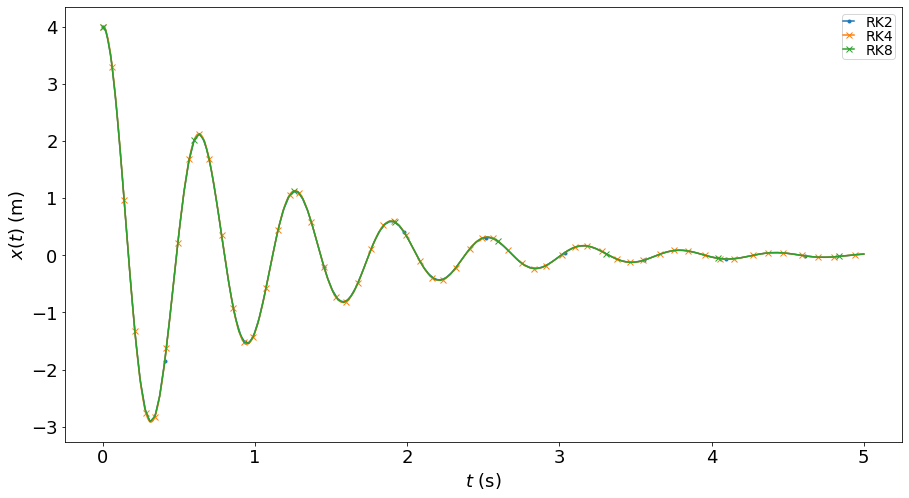

In [48]:
#let's plot the results
mf=18
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(odeRK2.t,odeRK2.y[1],marker='.',markevery=20,label='RK2')
ax.plot(odeRK4.t,odeRK4.y[1],marker='x',markevery=20,label='RK4')
ax.plot(ode.t,ode.y[1],marker='x',markevery=20,label='RK8')
legend = ax.legend(loc='best', shadow=False,fontsize=14,borderpad = 0.1, labelspacing = 0, handlelength = 0.8)

ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$x(t)$ (m)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$t$ (s)',fontsize=mf)
plt.show()

#all look very similar, see later

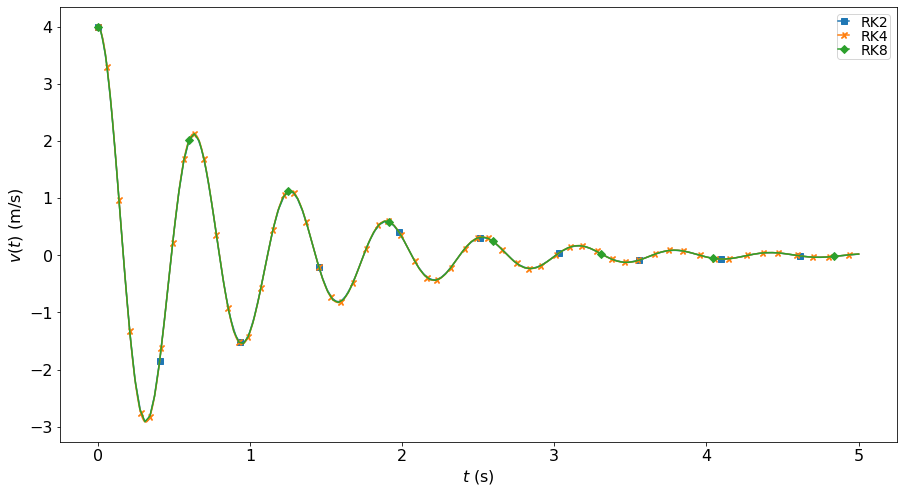

In [7]:
#let's plot the results                                                               
mf=16
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(odeRK2.t,odeRK2.y[1],marker='s',markevery=20,label='RK2')
ax.plot(odeRK4.t,odeRK4.y[1],marker='$x$',markevery=20,label='RK4')
ax.plot(ode.t,ode.y[1],marker='D',markevery=20,label='RK8')
legend = ax.legend(loc='best', shadow=False,fontsize=14,borderpad = 0.1, labelspacing = 0, handlelength = 0.8)

ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$v(t)$ (m/s)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$t$ (s)',fontsize=mf)
plt.show()

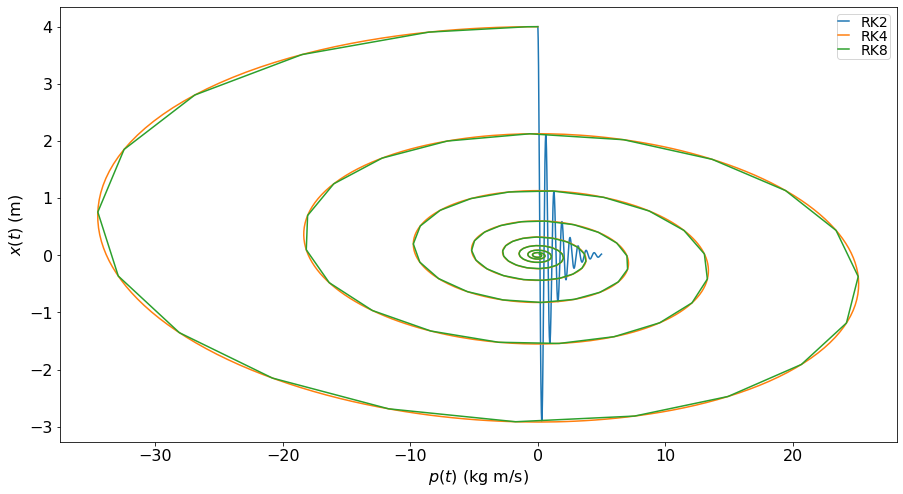

In [8]:
mf=16
fig, ax = plt.subplots(figsize=(15,8))
#ax.plot(ode[:,0]*m,ode[:,1])
ax.plot(odeRK2.t,odeRK2.y[1],label='RK2')
ax.plot(odeRK4.y[0]*m, odeRK4.y[1],label='RK4')
ax.plot(ode.y[0]*m,ode.y[1], label='RK8')


legend = ax.legend(loc='best', shadow=False,fontsize=14,borderpad = 0.1, labelspacing = 0, handlelength = 0.8)

ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$x(t)$ (m)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$p(t)$ (kg m/s)',fontsize=mf)
plt.show()

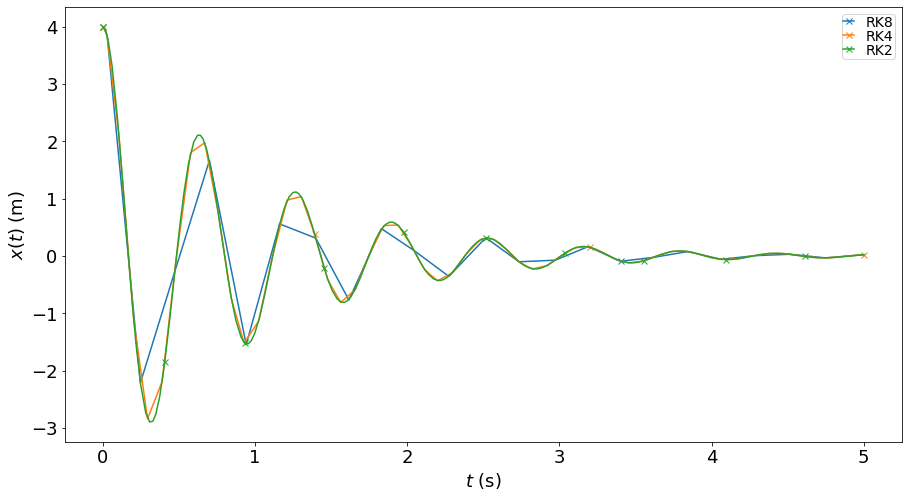

In [9]:
# while RK4 shows a continuous function RK8 is more edgy and RK2 does not form a spiral at all
# removed atol and rtol -> RK2 more accurate than RK4 more accurate than RK8

ode1 = solve_ivp(deriv, ts, y0, method='DOP853', args=(omega2,)) 

odeRK41 = solve_ivp(deriv, ts, y0, method='RK45', args=(omega2,))

odeRK21 = solve_ivp(deriv, ts, y0, method='RK23', args=(omega2,))

#let's plot the results
mf=18
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(ode1.t,ode1.y[1],marker='x',markevery=20,label='RK8')
ax.plot(odeRK41.t,odeRK41.y[1],marker='x',markevery=20,label='RK4')
ax.plot(odeRK21.t,odeRK21.y[1],marker='x',markevery=20,label='RK2')
#ax.plot(odeold.t,odeold.y[1],marker='x',markevery=20,label='odeint')
#ax.plot(ts,odeold[:,1],marker='x',markevery=20,label='odeint')
legend = ax.legend(loc='best', shadow=False,fontsize=14,borderpad = 0.1, labelspacing = 0, handlelength = 0.8)

ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$x(t)$ (m)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$t$ (s)',fontsize=mf)
plt.show()

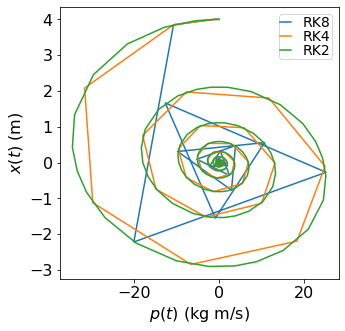

In [10]:
mf=16
fig, ax = plt.subplots(figsize=(5,5))
#ax.plot(ode[:,0]*m,ode[:,1])
ax.plot(ode1.y[0]*m,ode1.y[1],label='RK8')
ax.plot(odeRK41.y[0]*m, odeRK41.y[1],label='RK4')
ax.plot(odeRK21.y[0]*m,odeRK21.y[1],label='RK2')
legend = ax.legend(loc='best', shadow=False,fontsize=14,borderpad = 0.1, labelspacing = 0, handlelength = 0.8)

ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$x(t)$ (m)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$p(t)$ (kg m/s)',fontsize=mf)
plt.show()

# Task 2 (optional): The Kepler problem in 2D

Perform an ODE integration using scipy ODE integration for a planet evolving around a star at fixed position $(x_S,y_S) = (0,0)$. 
The force on the planet at position $\vec{r}=(x,y)$ is given by:

\begin{align}
 \vec{F}(x,y) = \vec{F}(\vec{r}) = G \frac{M m}{|\vec{r}|^3} \vec{r} =  -\frac{\vec{r}}{|\vec{r}|^3}  
\end{align}

where $M$ is the mass of the star, $m$ is the mass of the planet and $G$ is the gravitational constant. Use $G M m = -1$ and chose as initial conditions $\vec{r} = (5,0)$, $\vec{v} = \dot{\vec{r}} = (0,0.3)$

Plot the orbit for the interval $t=[0,37]$. (How would you detect when an orbit is completed? Check the `event` option of `solve_ivp`.)

Show numerically that Keplers second law is fulfilled: the connecting line between the star and the planet sweeps ower equal areas in equal times. You may calulare an infenitesimal area $dA(t)$ by  using the relation $dA = \frac{1}{2} \left|\vec{r}\times \vec{v}\right| dt $ and prove that $ \left|\vec{r}\times \vec{v}\right| = {\rm const}$ (within numerical accuracy). Check also if the energy $E=\frac12 v^2-\frac1{r} $ is conserved (within numerical accuracy). 

(Hint: when plotting constant data that changes on some microscopic scale, matplotlib will, if optons like y-limits are not set explicitly, adjust to the scale and only show a tiny indicator of the scale in the top left of the image such that one may mistakenly assume that the tiny changes of the data are huge) 


\begin{align}
 \vec{F}(x,y) = \vec{F}(\vec{r}) = G \frac{M m}{\sqrt (x^2+y^2)^3} \begin{pmatrix} 
x \\
y
\end{pmatrix}  =  -\frac{1}{|\vec{r}|^3}\cdot \vec{r}
\end{align}

\begin{align}
 \frac{d^2\vec r}{dt^2} = \frac{d\vec v}{dt} = -\frac{1}{m}\cdot \left(\frac{1}{|\vec{r}|^3} \cdot \begin{pmatrix} 
x \\
y
\end{pmatrix}\right)
\end{align}

\begin{align}
 \frac{d\vec r}{dt} = \vec v
\end{align}

\begin{align}
\frac{d }{dt} 
\begin{pmatrix} 
\vec v \\
\vec r
 \end{pmatrix} 
 & = 
 \frac{d }{dt}  u =
\begin{pmatrix} 
-\frac{1}{m}* \left(-\frac{1}{|\vec{r}|^3}\cdot\vec r  \right)  \\
\vec v
 \end{pmatrix} 
\end{align}


In [124]:
from numpy import *
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp


rx0,ry0,vx0,vy0,t_0,t_f = 5.0,0.0,0.0,0.3,0.0,0.37

def dr_dt(z, t):                                             #odeint version f(z, t) (solve_ivp f(t, z))
    m = 1
    mu = -1/m          
    rx, ry, vx, vy = z
    r = sqrt(rx**2 + ry**2)                                   #calculate |r|
    
    dzdt = [vx, vy, (mu/(r**3))*rx, (mu/(r**3))*ry]           # list that contains d/dt * vx, vy, rx,ry
    
    return dzdt
                                 # for greater timespan we get an ellipse (1) and periodic functions (2) and  (3)
t = arange(t_0, t_f, 0.001)
z0 = [rx0,ry0,vx0,vy0]
zodeint = odeint(dr_dt, z0, t)

In [178]:
def dr_dt1(t, z):                                               #solve_ivp version
    m = 1
    mu = -1/m
    rx, ry, vx, vy = z                                           
    r = sqrt(rx**2 + ry**2)
    
    dzdt = [vx, vy, (mu/(r**3))*rx, (mu/(r**3))*ry]
    
    return dzdt
 
                                                # event function needed -> we want y to be zero
def eventy(t, z):                               # every second y a full orbit is completed
    return z[1]



t1 =[t_0,t_f]

In [179]:
z1 = solve_ivp(dr_dt1, t1, z0, method='RK23', rtol=1e-10, atol = 1e-10,)  #RK23 looks best

z2 = solve_ivp(dr_dt1, t2, z0, method='RK23',events = [eventy], rtol=1e-10, atol = 1e-10,)

#print events for greater time interval to keep track of orbit 

print(z2.t_events) #-> t for one orbit: t = 36.40301274

[array([ 0.        , 18.20150638, 36.40301274, 54.60451913, 72.80602551,
       91.0075319 ])]


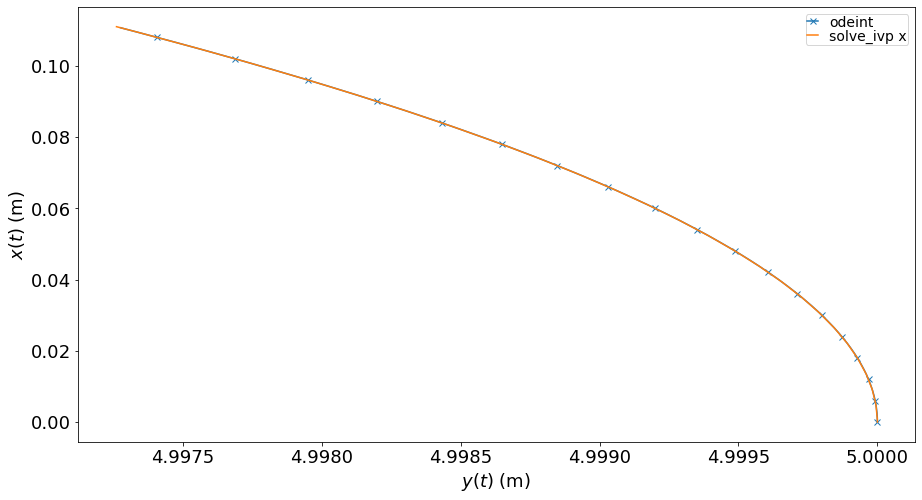

In [180]:
#orbit:

mf=18
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(zodeint[:,0],zodeint[:,1],marker='x',markevery=20,label='odeint')
ax.plot(z1.y[0],z1.y[1],markevery=20,label='solve_ivp x')
legend = ax.legend(loc='best', shadow=False,fontsize=14,borderpad = 0.1, labelspacing = 0, handlelength = 0.8)

ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$x(t)$ (m)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$y(t)$ (m) ',fontsize=mf)
plt.show()

In [302]:
from numpy.linalg import norm

import numpy
r = (z1.y[0], z1.y[1])
v = (z1.y[2],z1.y[3])
def A(t):
    A = zeros(len(t))
    dt = diff(t)
    for i,j in enumerate(t): 
        A[i] = 1/2*norm(cross((r[0][i],r[1][i]),(v[0][i],v[1][i])))*j
        I = A.sum()*dt
    return I
A(z1.t)             # you can see that every element of the array (expect I[0,1,-1]) is ~ 0.55-0.56 
                    # -> |r x v| = const.

array([0.00071971, 0.0071971 , 0.05473607, 0.05481346, 0.05489063,
       0.05496756, 0.05504425, 0.05512071, 0.05519692, 0.0552729 ,
       0.05534863, 0.05542413, 0.05549938, 0.05557438, 0.05564914,
       0.05572366, 0.05579793, 0.05587195, 0.05594572, 0.05601924,
       0.05609251, 0.05616553, 0.05623829, 0.05631081, 0.05638307,
       0.05645507, 0.05652682, 0.02006796])

In [329]:
def E(t):
    dt = diff(t)
    E = zeros(len(t))
    i = 1
    while i < int(len(t)):
        E[i] = 1/2 * (v[0][i]**2 + v[1][i]**2) - 1/r[0][i] - 1/r[1][i]
        i +=1
    for j in t:
        E1 = E[1:]*dt
    return E1
E(z1.t)                #energy is not preserved?

array([-3.33336242, -3.03059391, -2.91434669, -1.55765445, -1.06378988,
       -0.80823241, -0.65202082, -0.54665233, -0.47077851, -0.41353542,
       -0.36881112, -0.33290357, -0.30343942, -0.27882702, -0.25795907,
       -0.24004139, -0.22448958, -0.210864  , -0.1988276 , -0.18811763,
       -0.17852623, -0.16988683, -0.16206435, -0.15494813, -0.14844662,
       -0.14248343, -0.13699435, -0.0479592 ])